In [1]:
!pip install pandas
import pandas as pd

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
categorical = ['Seller_Type','Fuel_Type','Transmission']
for i in categorical:
    print(i,'-',df[i].unique())

Seller_Type - ['Dealer' 'Individual']
Fuel_Type - ['Petrol' 'Diesel' 'CNG']
Transmission - ['Manual' 'Automatic']


#### Missing value check

In [5]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Car name may not play a key role in the price, so we drop the feature.

In [7]:
df.drop('Car_Name',axis=1,inplace=True)

#### Deriving how old the car is

In [8]:
df['no_of_years'] = 2020 - df['Year']

In [9]:
df.drop('Year',axis=1,inplace=True)

In [10]:
df = pd.get_dummies(df,drop_first=True)

In [11]:
!pip install seaborn
import seaborn as sns

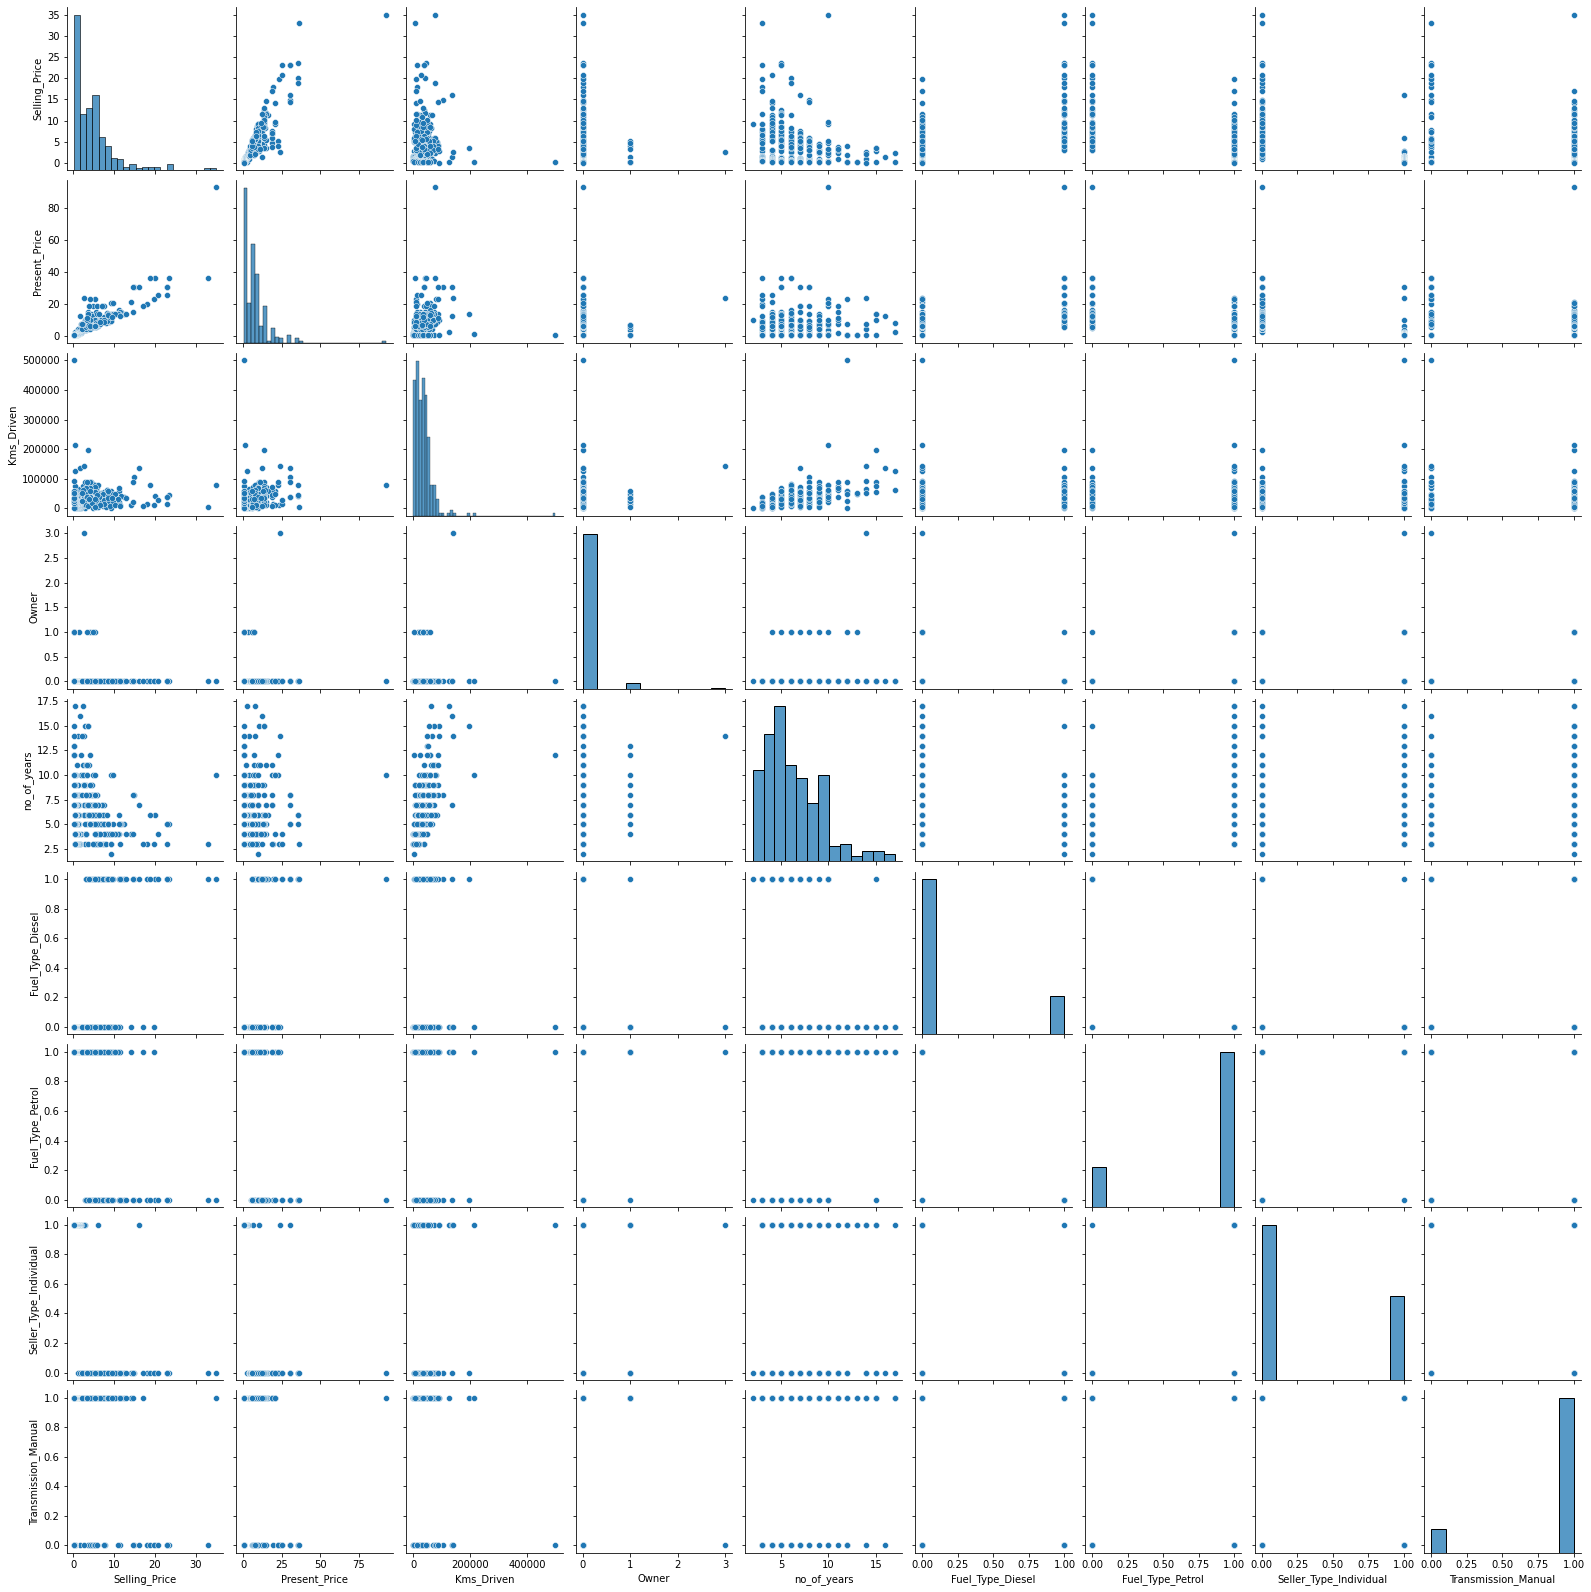

In [12]:
sns.pairplot(df)

In [13]:
import matplotlib.pyplot as plt

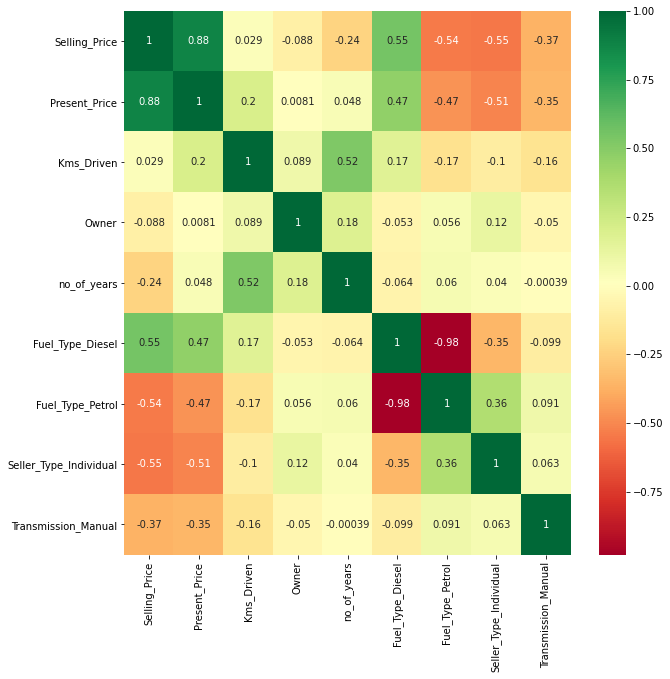

In [14]:
corr_mat = df.corr()
corr_features = corr_mat.index
plt.figure(figsize = (10,10))
plot = sns.heatmap(df[corr_features].corr(),annot=True,cmap='RdYlGn')

In [15]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [16]:
# Setting target variable
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [17]:
!pip install sklearn
from sklearn.ensemble import ExtraTreesRegressor

In [18]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [19]:
print(model.feature_importances_)

[0.40411533 0.04202045 0.00040797 0.07617254 0.22077114 0.0127239
 0.1181165  0.12567218]


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
# Hyper parameters
import numpy as np

# Number of trees in Random forest
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]

# The number of features to consider when looking for the best split
max_features = ['auto','sqrt','log2']

# Maximum number of levels in each tree (The maximum depth of the tree)
max_depth = [int(x) for x in np.linspace(10,100,10)]

# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,5,6]

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
rf = RandomForestRegressor()

In [26]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,
                              verbose=2,random_state=0,n_jobs=1)

In [27]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=50, total=   1.5s
[CV] n_estimators=600, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=50, total=   1.4s
[CV] n_estimators=600, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=50 
[CV]  n_estimators=600, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=50, total=   1.4s
[CV] n_estimators=600, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=50 
[CV]  n_estimators=600, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=50, total=   1.4s
[CV] n_estimators=600, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=50 
[CV]  n_estimators=600, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=50, total=   1.5s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, total=   4.0s
[CV] n_estimators=1600, min_samples_split=2, min_s

[CV]  n_estimators=800, min_samples_split=3, min_samples_leaf=6, max_features=auto, max_depth=80, total=   1.9s
[CV] n_estimators=800, min_samples_split=3, min_samples_leaf=6, max_features=auto, max_depth=80 
[CV]  n_estimators=800, min_samples_split=3, min_samples_leaf=6, max_features=auto, max_depth=80, total=   1.9s
[CV] n_estimators=800, min_samples_split=3, min_samples_leaf=6, max_features=auto, max_depth=80 
[CV]  n_estimators=800, min_samples_split=3, min_samples_leaf=6, max_features=auto, max_depth=80, total=   1.9s
[CV] n_estimators=800, min_samples_split=3, min_samples_leaf=6, max_features=auto, max_depth=80 
[CV]  n_estimators=800, min_samples_split=3, min_samples_leaf=6, max_features=auto, max_depth=80, total=   1.9s
[CV] n_estimators=800, min_samples_split=3, min_samples_leaf=6, max_features=auto, max_depth=80 
[CV]  n_estimators=800, min_samples_split=3, min_samples_leaf=6, max_features=auto, max_depth=80, total=   1.9s
[CV] n_estimators=1000, min_samples_split=5, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 5, 6],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [28]:
predictions = rf_random.predict(X_test)

C:\Users\BARADWAJ\Anaconda3\envs\car_price\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

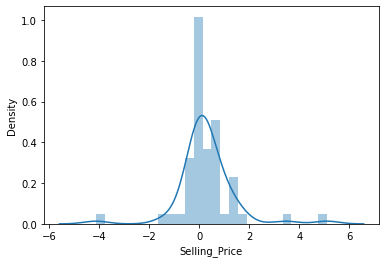

In [29]:
sns.distplot(y_test-predictions)

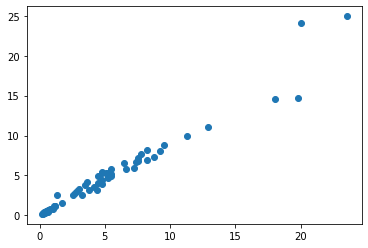

In [30]:
plt.scatter(y_test,predictions)

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

1.2924975890762385

In [31]:
import pickle

file = open('random_forest_regression_model.pkl','wb')

pickle.dump(rf_random,file)